# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [23]:
import nltk
# nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
# !pip install sentence-transformers
from sentence_transformers import SentenceTransformer


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [25]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [26]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [27]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [28]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding




In [29]:
X = list()
for article in newsgroups_train['data']:
    X.append(get_review_embedding(article=article))

    

In [30]:
X, y = X, newsgroups_train['target']

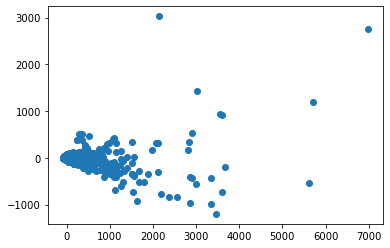

In [31]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=100)
model = pca.fit_transform(X)

plt.scatter(model[:,0], model[:,1])
plt.show()


# K_Means Algorithm


In [32]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=4).fit(X)
kmeans.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

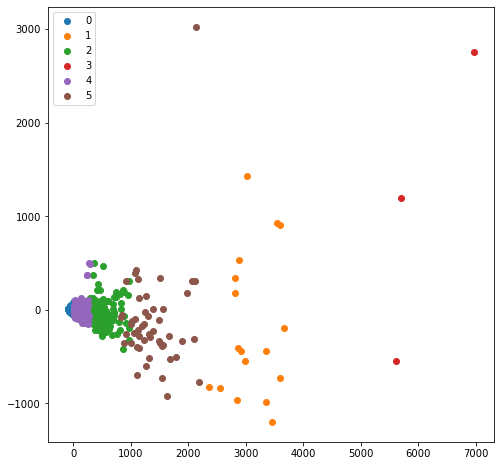

In [33]:
#code for visualisation of clusters

plt.figure(figsize=(8,8))

for i in np.unique(kmeans.labels_):
    plt.scatter(model[kmeans.labels_==i,0], model[kmeans.labels_==i,1], label=i)

plt.legend()
plt.show()



# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







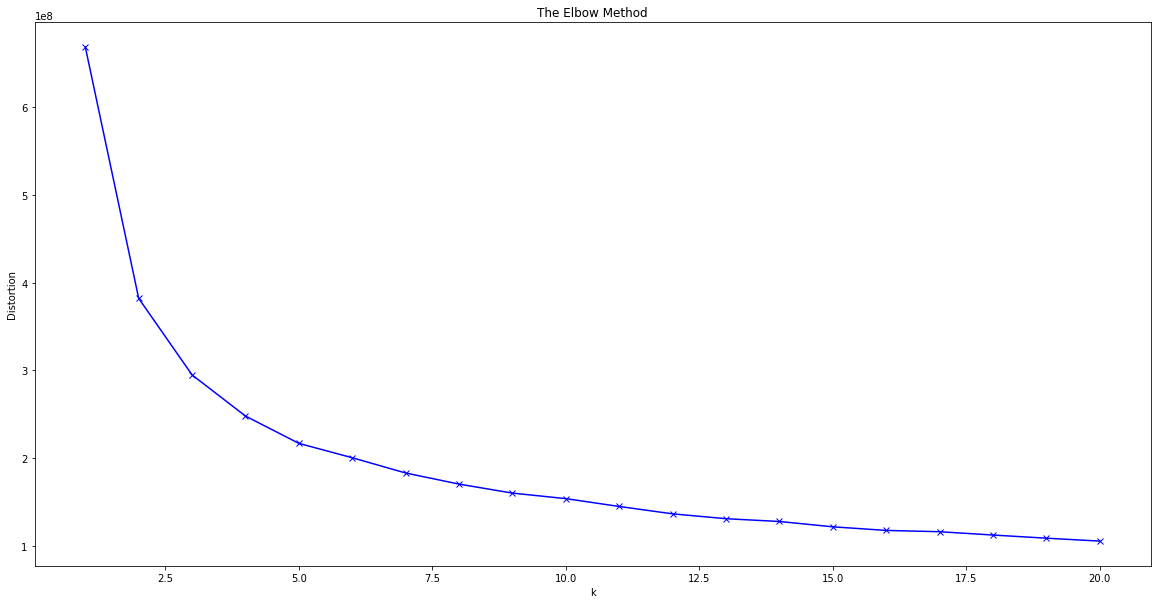

In [34]:
def elbow_method():
    distortions = []
    K = range(1,21)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(20, 10))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method')
    plt.show()



elbow_method()


#### The optimal number of Clusters as per Elbow Method is **5**

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




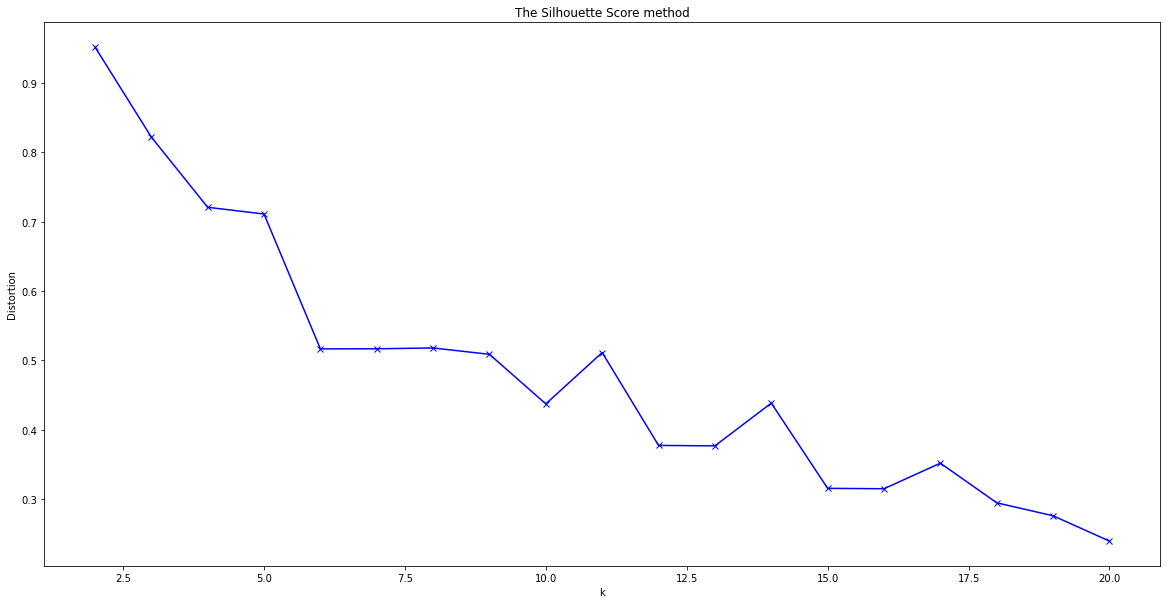

In [35]:
from sklearn.metrics import silhouette_score

def silhouette_score():
    K = range(2,21)
    s_score = list()
    for k in K:
        kmeans = KMeans(n_clusters=k)
        pred = kmeans.fit_predict(X)
        centers = kmeans.cluster_centers_

        s_score.append(sklearn.metrics.silhouette_score(X, pred))

    plt.figure(figsize=(20,10))
    plt.plot(K, s_score, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Silhouette Score method')
    plt.show()

silhouette_score()

#### The optimal number of Clusters as per Silhoutte Score Method is **5**

For determining the optimal number of clusters using elbow method we select the value of 'K' where the 'elbow' is formed i.e. the point in the graph after which the inertia/ distortion start decreasing in linear fashion. By seeing the graph, we can conclude that the optimal value of 'K' i.e. number of clusters is 5.

# Agglomerative clustering

In [36]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

# def AgglomerativeClustering():
aglo_cluster = AgglomerativeClustering(n_clusters=6).fit(X)
aglo_cluster.labels_
  


array([2, 2, 2, ..., 2, 2, 2])

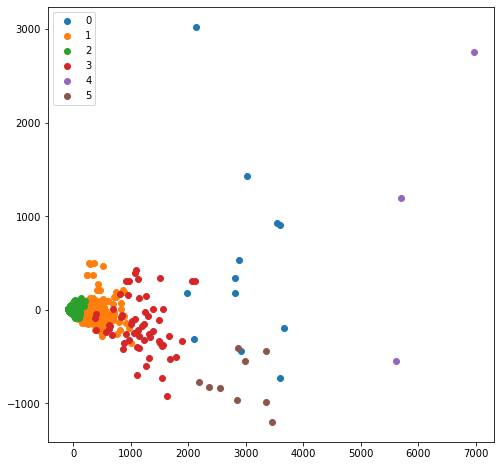

In [37]:
#code for visualisation of clusters


plt.figure(figsize=(8,8))

for i in np.unique(aglo_cluster.labels_):
    plt.scatter(model[aglo_cluster.labels_==i,0], model[aglo_cluster.labels_==i,1], label=i)

plt.legend()
plt.show()


# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



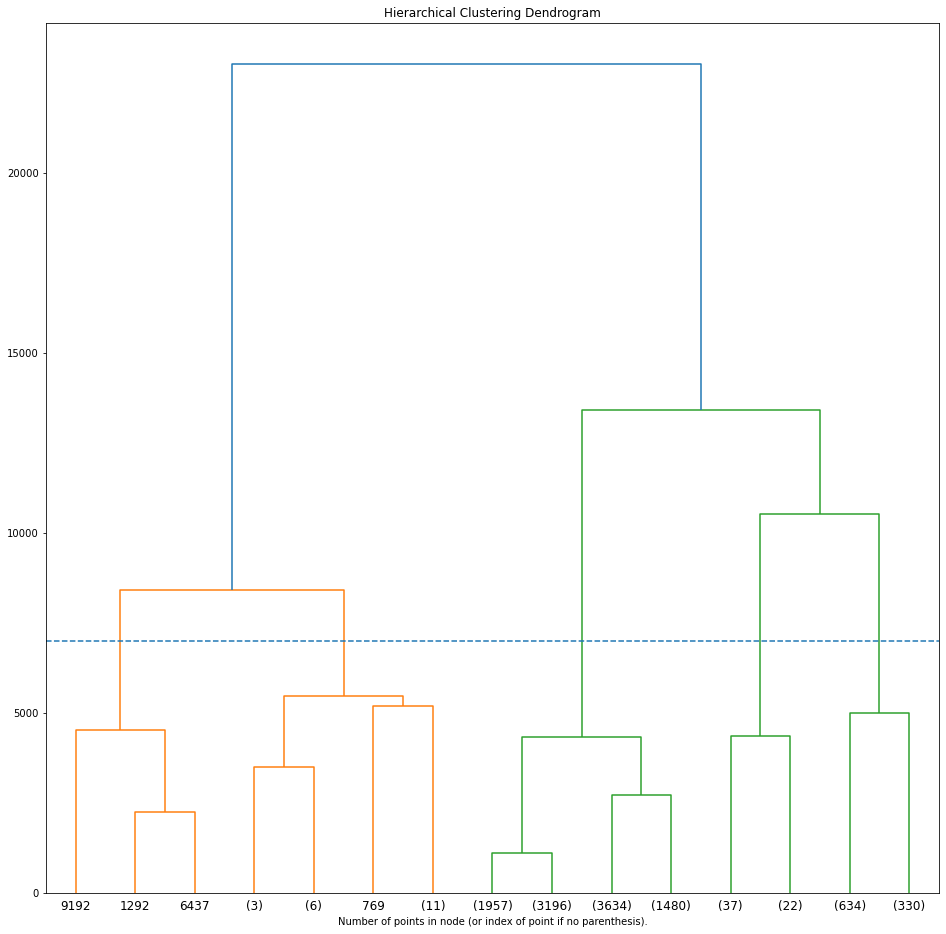

In [38]:
# code to write dendogram

from scipy.cluster.hierarchy import linkage, dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    return dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

plt.figure(figsize=(16, 16))
plt.title("Hierarchical Clustering Dendrogram")

dend = plot_dendrogram(model, truncate_mode="level", p=3)
plt.axhline(y = 7000, linestyle='--')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()



#### The optimal number of Clusters as per Dendrogram is **5**

## Difference between Agglomerative clustering and Divisive clustering

- Agglomerative clustering is easier than Divisive clustering because Divisive clustering requires the use of a "subroutine" to break clusters until each data point gets its own cluster.

- Agglomerative clustering is less efficient than Divisive clustering. For naïve Agglomerative Clustering, the time complexity is O(n3). We can reduce the time complexity to O(n2 logn) by using a priority queue. Divisive clustering techniques are linear in number of clusters and patterns when given a constant number of top levels and employing efficient flat K-means.

- The Divisive algorithm is more accurate than the Agglomerative method. We make judgments in agglomerative clustering by evaluating local patterns or neighbouring spots without taking global distribution into consideration. When deciding on top-level partitioning in divisive clustering, the global distribution of data is taken into account.

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


